In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.dat to movies.dat
Saving ratings.dat to ratings.dat


In [ ]:
 import pandas as pd
 pd.__version__

'1.1.5'

In [ ]:
!pip install pandas==0.23.4

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

import pandas as pd
from pandas.compat import StringIO

In [ ]:
from pandas import compat
from pandas.compat import lzip

In [ ]:
ratings="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/ratings.csv"
movies="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/movies.csv"


df_ratings = pd.read_csv(ratings, sep=',')
df_ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
df_movies = pd.read_csv(movies, sep=',')
df_movies.columns = ['itemId', 'title', 'genres']

In [ ]:
#Print rating data
df_ratings.head(20)


,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [ ]:
#Print movie data
df_movies.head(20)

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
df_ratings['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [ ]:
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

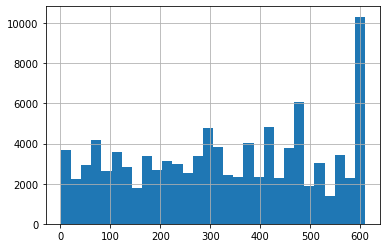

In [ ]:
df_ratings['userId'].hist(bins=30)

In [ ]:
df_ratings.userId.value_counts().describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: userId, dtype: float64

In [ ]:
#create a dataframe for analysis
trend=pd.DataFrame(df_ratings.groupby('userId')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(df_ratings.groupby('userId')['rating'].count()) 
trend.head()

,rating,total number of ratings
userId,,
1,4.366379,232
2,3.948276,29
3,2.435897,39
4,3.555556,216
5,3.636364,44


In [ ]:
import matplotlib.pyplot as plt


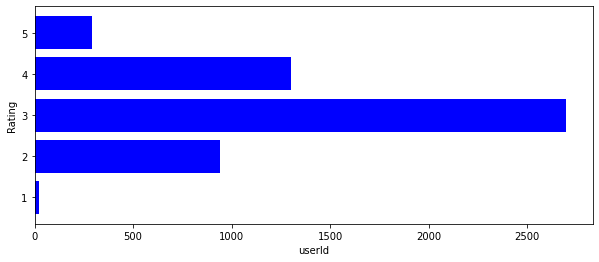

In [ ]:
#Give a graphical representation of how the total number of users varies from rating 1 to 5.
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.xlabel('userId')
plt.ylabel('Rating')
plt.show()

In [ ]:
#Print max, min, and average ratings for userId 10.
df_ratings.query('userId == 10').rating.describe()



count    140.000000
mean       3.278571
std        1.175700
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64

In [ ]:
#Give a graphical representation of how the total number of users (based on the number of
#posted ratings) varies from time to time.#

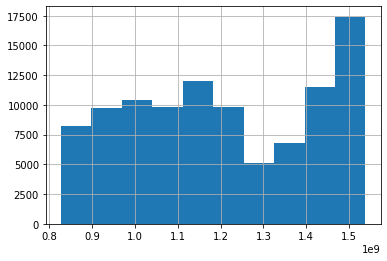

In [ ]:
df_ratings.timestamp.hist()

In [ ]:
#Convert the Rating data to matrix form where columns indicate ‘userId' and row indicates
#‘itemId’ and each entry indicates rating values.


df_user_item = df_ratings.pivot(index='userId', columns='itemId', values='rating') # Use df.pivot, rows ~ userId's, columns ~ itemId's
################################

# Sort index/rows (userId's) and columns (itemId's)
df_user_item.sort_index(axis=0, inplace=True)
df_user_item.sort_index(axis=1, inplace=True)

In [ ]:
#For instance, print rating for userId=10 for movies with itemId 1 to 30.


In [ ]:
df_user_item.loc[10][:30]

itemId
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
30   NaN
Name: 10, dtype: float64

In [ ]:
#Save the movie ids for userId: 21.

In [ ]:
#Join the data set 
movies_rating = (df_ratings
                  .set_index("itemId")
                  .join(df_movies.set_index("itemId"),
                        how="left")
                 )

movies_rating.head(2)

,userId,rating,timestamp,title,genres
itemId,,,,,
1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
user_21=movies_rating.query('userId == 21')

In [ ]:
user_21

,userId,rating,timestamp,title,genres
itemId,,,,,
1,21,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,21,3.5,1419795031,Jumanji (1995),Adventure|Children|Fantasy
10,21,5.0,1403459783,GoldenEye (1995),Action|Adventure|Thriller
19,21,2.5,1419795052,Ace Ventura: When Nature Calls (1995),Comedy
38,21,2.5,1419795113,It Takes Two (1995),Children|Comedy
44,21,1.0,1376822969,Mortal Kombat (1995),Action|Adventure|Fantasy
48,21,3.0,1376822924,Pocahontas (1995),Animation|Children|Drama|Musical|Romance
145,21,3.0,1376823315,Bad Boys (1995),Action|Comedy|Crime|Drama|Thriller
165,21,3.5,1418846918,Die Hard: With a Vengeance (1995),Action|Crime|Thriller


In [ ]:
#OR
item_rated_user_21 = df_user_item.loc[21].dropna().index
item_rated_user_21

Int64Index([     1,      2,     10,     19,     38,     44,     48,    145,
               165,    170,
            ...
            152081, 160565, 160872, 164179, 164909, 166492, 167036, 168248,
            168252, 173307],
           dtype='int64', name='itemId', length=443)

In [ ]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and movies
    - 2 mapping disctionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}

    items = pd.DataFrame(data_encoded.itemId.unique(),columns=['itemId']) # df of all unique items
    dict_items = items.to_dict()    
    inv_dict_items = {v: k for k, v in dict_items['itemId'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.itemId = data_encoded.itemId.map(inv_dict_items)

    return data_encoded, dict_users, dict_items
  

In [ ]:
# Adapted from http://nicolas-hug.com/blog/matrix_facto_4
def SGD(data,           # dataframe containing 1 user|item|rating per row
        n_factors = 10, # number of factors
        alpha = .01,    # learning rate
        n_epochs = 3,   # number of iteration of the SGD procedure
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''

    # Encoding userId's and itemId's in data
    data, dict_users, dict_items = encode_ids(data)
    
    ##### FILL HERE (2 lines) ######
    n_users = data.userId.nunique()  # number of unique users
    n_items = data.itemId.nunique()  # number of unique items
    ################################
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .1, (n_users, n_factors))
    q = np.random.normal(0, .1, (n_items, n_factors))

    # Optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        # Loop over the rows in data
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            u = int(row.userId)      # current userId = position in the p vector (thanks to the encoding)
            i = int(row.itemId)      # current itemId = position in the q vector
            r_ui = float(row.rating) # rating associated to the couple (user u , item i)
            
            ##### FILL HERE (1 line) ######
            err = r_ui-np.dot(p[u],q[i].transpose()) 
            print (err)   # difference between the predicted rating (p_u . q_i) and the known ratings r_ui
            ################################
            
            # Update vectors p_u and q_i
            ##### FILL HERE (2 lines) ######
            p_old = p[u]
            p[u] = p[u] + alpha*err*q[i]  # cf. update rule above 
            q[i] = q[i] + alpha*err*p_old
            ################################
            
    return p, q
    
    
    
def estimate(u, i, p, q):
    '''Estimate rating of user u for item i.'''
    ##### FILL HERE (1 line) ######
    return np.dot(p[u], q[i].transpose())            #scalar product of p[u] and q[i] /!\ dimensions
    ################################  

In [ ]:
#Model 1: Apply Approximate SVD with stochastic gradient descend (SGD) on the dataset with  
#n_factors = 10, # number of factors
#alpha = .01,    # learning rate
#n_epochs = 3,   # number of iteration of the SGD procedure

In [ ]:
p, q = SGD(df_ratings)

Streaming output truncated to the last 5000 lines.
1.9689219665118969
-0.5964171565849914
1.1677237616776113
0.6327905236945712
-0.01640182288618819
1.533588217621162
1.1786907454664655
0.24041027135631143
-1.849843847046107
-1.961882895440747
2.509558593780393
1.6431200728501345
0.4178833771053694
1.5590893029528794
0.37166862465044215
1.2332408038608604
-1.804168766493667
-0.7345695129825831
-2.2216596329110168
-1.8027412087414652
-1.9256702340849734
1.1298253522571788
-1.9733718316750535
-0.03063084443581099
2.83049428872791
0.16538163427371488
-0.29178064411172766
0.5613709957450479
0.05730166520976798
-0.6376385768793433
0.011835999850259071
-0.13974350938061075
0.4303716495753669
0.3595696586260164
0.05480386537005888
-0.2110668268416953
-0.4464154184003126
-0.2266449346056314
-0.6922174267055743
-0.6269784706189903
0.4584639866041087
-0.5794125563680792
0.21114744829630272
-0.6731766662966772
0.010540940678523292
-0.30964142615731927
-0.1428864454580081
-0.6694157157972613
-0.36

In [ ]:
#Print Originally available ratings for userId: 3.
#PRINT predicted ratings for user 3 using Model 1, Model 2 and Model 3.
#Then compare MAE of Model 1, Model 2 and Model 3.

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.142781,3.613733,4.737692,4.940791,5.321528,3.872758,4.317670,4.746457,5.153019,3.078864,4.863280,3.994427,4.485519,3.839456,4.517451,5.051456,5.727254,4.588509,4.866878,5.030768,5.321852,4.534595,4.193693,2.983520,5.095811,5.451951,5.105131,4.961773,5.822513,4.648428,4.440835,5.103920,5.374029,4.512599,5.934101,4.215005,5.568828,4.725613,4.750127,3.838933,...,1.448646,1.068366,1.804434,1.788642,1.513143,1.107816,1.798097,1.876575,1.427956,1.347894,1.282500,1.521656,1.678513,2.152329,1.293396,1.416458,1.626970,1.748778,0.574903,2.302310,1.391885,1.413832,1.779213,2.028300,1.750643,1.134441,1.607849,0.326448,1.842441,1.799022,1.552184,1.798602,1.556551,1.591710,1.377330,0.922532,1.845997,1.380609,1.513609,1.871629
1,1.815312,1.613915,2.131894,2.042678,2.417041,2.161943,2.170475,1.527117,2.083142,1.257409,2.156780,1.946260,2.144963,1.329061,2.046587,2.123399,1.947518,1.483166,2.004826,1.351598,1.683527,1.886400,1.304273,1.128847,2.375401,1.176374,1.030814,1.531000,1.599712,1.908349,1.579379,1.930026,1.348005,1.094455,1.457448,1.344744,1.259435,1.016468,1.739229,1.595068,...,0.589168,0.412683,0.642461,0.796929,0.630263,0.369756,0.677610,0.530723,0.418694,0.510270,0.274604,0.701054,0.434270,0.973663,0.506520,0.762917,0.678950,0.710608,0.177782,1.039123,0.638694,0.358368,0.720680,0.762097,0.598057,0.563467,0.555125,0.070253,0.996672,0.717634,0.501480,0.769286,0.519951,0.808160,0.360016,0.360543,0.828006,0.568296,0.618255,0.822978
2,0.951458,0.795678,1.005092,1.140441,1.101132,0.954922,0.959295,1.046741,1.020348,0.621592,1.059978,0.871319,1.030330,0.784683,0.905244,1.028976,1.267588,0.948411,1.059781,1.031309,1.226853,0.956459,0.901628,0.657980,1.139961,1.112588,1.043574,0.992770,1.188336,0.973828,0.868526,1.010878,1.134748,0.901012,1.145903,0.806648,1.082446,0.855133,0.886272,0.786573,...,0.356452,0.239250,0.303929,0.378742,0.329381,0.200110,0.366200,0.393683,0.336132,0.253466,0.161684,0.345629,0.343916,0.467524,0.397178,0.258482,0.405962,0.382338,0.098658,0.570583,0.337307,0.227936,0.439727,0.455627,0.389337,0.226892,0.309515,0.095634,0.411462,0.426676,0.344296,0.337801,0.316826,0.338940,0.357125,0.179915,0.374468,0.242103,0.248458,0.390575
3,3.026975,2.722707,3.571799,3.504531,3.599288,2.837919,3.342022,3.354688,4.044967,2.364794,3.668708,2.954344,3.152107,2.867893,3.451941,3.759080,4.176582,3.357407,3.713229,3.914790,3.654215,3.532785,3.097930,2.401036,3.955385,4.053624,3.874854,3.786847,4.043375,3.646911,3.404902,3.958722,4.247465,3.498103,4.523073,3.389455,4.353854,3.772560,3.732547,2.839733,...,1.211957,0.944111,1.488477,1.443462,1.229783,0.925379,1.474669,1.548656,1.159295,1.152466,1.096414,1.211567,1.471356,1.560843,1.085649,1.146746,1.315117,1.375373,0.480390,1.775296,1.069315,1.276005,1.357755,1.679351,1.389974,1.018678,1.298550,0.263626,1.303549,1.495066,1.239407,1.346873,1.311430,1.273619,1.186423,0.734686,1.501213,1.075041,1.182073,1.531303
4,2.243245,1.862013,2.373550,2.645218,2.769757,1.686961,2.058020,2.787062,2.666956,1.546324,2.486622,1.949952,2.189320,2.087425,2.297333,2.636719,3.213443,2.641986,2.517926,3.027176,3.152101,2.322292,2.524805,1.552323,2.539352,3.326769,3.198329,2.892772,3.417252,2.401742,2.471306,2.753636,3.327305,2.719594,3.548434,2.387364,3.375220,2.889030,2.461309,1.972880,...,0.716374,0.517377,0.903837,0.871814,0.798723,0.595868,0.918542,1.062676,0.854029,0.753747,0.685567,0.676454,0.928926,1.025833,0.683160,0.673751,0.830514,0.838429,0.323717,1.078379,0.658868,0.859287,0.899527,1.106738,0.991784,0.586227,0.915998,0.217161,0.797662,0.934511,0.773154,0.912519,0.854609,0.710039,0.776160,0.472245,0.952981,0.737203,0.785444,0.910464


In [ ]:
df_ratings_encoded, dict_users, dict_items = encode_ids(df_ratings)

In [ ]:
df_user_item_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_item_filled.rename(index=(dict_users['userId']), inplace=True)

# Sort index/rows (userId's) and columns (itemId's)
df_user_item_filled.sort_index(axis=0, inplace=True)
df_user_item_filled.sort_index(axis=1, inplace=True)

df_user_item_filled.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,4.142781,4.216759,3.613733,1.219942,3.377072,4.737692,3.666684,2.325634,3.011132,4.634565,3.797507,2.489072,2.494959,4.086630,2.955921,4.286789,4.472486,3.711584,3.069082,2.680830,4.743402,4.344277,2.971752,3.352888,4.907114,3.111118,2.510419,3.909800,4.523270,1.708310,3.416852,4.478004,4.254439,4.713072,1.258436,4.452191,0.385435,3.725315,2.486500,2.830805,...,2.244445,0.554501,1.511786,1.658612,0.948135,1.596750,1.451561,3.351261,3.591185,1.633641,0.890220,2.712392,1.342202,0.883257,1.728479,1.439668,0.471573,0.849134,0.864403,0.313320,0.023850,1.061699,1.165258,-0.129416,0.678078,-0.425803,0.750200,0.221346,-0.343790,0.580541,1.408585,0.965007,0.485223,1.103117,1.118201,0.406974,0.869130,-0.017586,0.375613,0.491526
2,1.815312,1.835467,1.613915,0.662713,1.429397,2.131894,1.598554,1.123218,1.273207,1.824692,1.577614,1.436105,1.136911,1.674190,1.109987,2.087776,2.194518,1.847936,1.617903,1.587393,1.868463,1.881079,1.342779,1.650018,2.186738,1.346563,1.266562,1.806734,2.300758,0.655052,1.459247,1.700885,1.460476,2.101480,0.697223,1.986755,0.067406,1.651689,1.117219,1.204852,...,0.870905,0.471910,0.553310,0.775149,0.581027,0.613932,0.871848,2.049646,1.557238,0.849415,0.690622,1.341814,0.739369,0.648805,0.945944,0.824689,0.331099,0.236678,0.650024,0.421201,0.024647,0.512404,0.443329,-0.098404,0.211830,-0.154314,0.320731,0.228647,-0.013034,0.405764,0.756450,0.419009,0.402084,0.634609,0.597879,0.577558,0.532111,0.326871,0.235562,0.450412
3,0.951458,0.997942,0.795678,0.223247,0.768080,1.005092,0.687933,0.375673,0.600837,0.917103,0.809515,0.546245,0.491204,0.824647,0.607193,0.934415,0.900610,0.810637,0.638011,0.630341,1.003103,0.921158,0.558799,0.738650,1.083484,0.655221,0.530663,0.846707,1.004212,0.386876,0.796051,1.083161,0.883874,0.932502,0.299649,0.974537,0.029875,0.716601,0.542814,0.541098,...,0.505066,0.107992,0.346241,0.347425,0.207341,0.296042,0.329692,0.696381,0.828382,0.401253,0.153301,0.605117,0.225556,0.292343,0.371843,0.240010,0.081466,0.100747,0.249244,0.043550,0.011504,0.160936,0.264049,-0.062707,0.071372,-0.075791,0.100036,0.043789,-0.091569,0.136307,0.370158,0.259749,0.127092,0.251375,0.266078,0.151758,0.187090,0.067471,0.129793,0.127848
4,3.026975,3.116258,2.722707,1.022924,2.612433,3.571799,2.755772,1.775586,2.284631,3.513185,2.887231,1.871014,2.058082,3.249616,2.183403,3.278004,3.406650,2.832097,2.239133,2.030335,3.682535,3.390535,2.338294,2.578074,3.755803,2.580229,2.004467,2.953939,3.336664,1.432187,2.724308,3.203977,3.231270,3.680084,0.999102,3.487696,0.426488,2.903614,1.972728,2.245542,...,1.821054,0.408014,1.290377,1.215002,0.738384,1.288872,1.149701,2.561666,2.762105,1.391218,0.723626,2.116633,1.031538,0.611098,1.266443,1.034375,0.284426,0.649910,0.642177,0.120423,-0.007254,0.914847,0.952123,-0.106169,0.473790,-0.276323,0.524581,0.114266,-0.258221,0.504178,1.115449,0.729957,0.331048,0.853661,0.818739,0.294199,0.741443,-0.143807,0.272572,0.415909
5,2.243245,2.243118,1.862013,0.561140,1.661385,2.373550,1.828664,1.082535,1.535962,2.464119,1.917519,1.065026,1.254330,2.080168,1.561810,2.060848,2.103612,1.705480,1.424242,1.184277,2.570747,2.248704,1.495909,1.606641,2.447586,1.584434,1.131108,1.935753,2.203024,0.882583,1.725936,2.408621,2.386442,2.367426,0.630088,2.270711,0.216415,1.868751,1.253593,1.445452,...,1.148238,0.166137,0.749766,0.765066,0.457035,0.822487,0.622959,1.427839,1.747285,0.726808,0.270377,1.244912,0.580741,0.340044,0.818899,0.590965,0.193065,0.450622,0.314842,0.088632,0.034359,0.479671,0.620574,-0.057175,0.384611,-0.230982,0.419158,0.094831,-0.209145,0.219889,0.678450,0.463902,0.207237,0.451714,0.469277,-

In [ ]:
#Originally available ratings for user 3:

In [ ]:
df_user_item.loc[3][:50]

itemId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    0.5
32    NaN
34    NaN
36    NaN
38    NaN
39    NaN
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    NaN
52    NaN
53    NaN
54    NaN
Name: 3, dtype: float64

In [ ]:
df_user_item_filled.loc[3][:50]

1     0.951458
2     0.997942
3     0.795678
4     0.223247
5     0.768080
6     1.005092
7     0.687933
8     0.375673
9     0.600837
10    0.917103
11    0.809515
12    0.546245
13    0.491204
14    0.824647
15    0.607193
16    0.934415
17    0.900610
18    0.810637
19    0.638011
20    0.630341
21    1.003103
22    0.921158
23    0.558799
24    0.738650
25    1.083484
26    0.655221
27    0.530663
28    0.846707
29    1.004212
30    0.386876
31    0.796051
32    1.083161
34    0.883874
36    0.932502
38    0.299649
39    0.974537
40    0.029875
41    0.716601
42    0.542814
43    0.541098
44    0.709695
45    0.947401
46    0.668835
47    1.140441
48    0.736361
49   -0.124568
50    1.101132
52    0.807827
53    0.411908
54    0.164127
Name: 3, dtype: float64

In [ ]:
recommendations = list((df_user_item_filled.loc[50]).sort_values(ascending=False)[:50].index)
recommendations

[2571,
 1199,
 1276,
 1089,
 2324,
 1267,
 1221,
 1673,
 2019,
 1203,
 1272,
 1252,
 1104,
 1225,
 1233,
 750,
 2959,
 1213,
 1196,
 1197,
 1148,
 858,
 1035,
 904,
 1206,
 1617,
 1945,
 1223,
 2028,
 1193,
 1228,
 1247,
 1198,
 593,
 318,
 2542,
 1244,
 1201,
 1204,
 1704,
 924,
 1258,
 910,
 4993,
 1210,
 1278,
 1208,
 4226,
 474,
 1262]

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
412,474,In the Line of Fire (1993),Action|Thriller
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
686,904,Rear Window (1954),Mystery|Thriller
692,910,Some Like It Hot (1959),Comedy|Crime
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
792,1035,"Sound of Music, The (1965)",Musical|Romance
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller


In [ ]:
already_rated = list((df_user_item.loc[50]).sort_values(ascending=False)[:50].index)
already_rated

[1251,
 1204,
 1208,
 924,
 1199,
 7396,
 7327,
 1136,
 1201,
 1206,
 92475,
 1232,
 1252,
 1258,
 5618,
 1274,
 4928,
 4914,
 3730,
 3415,
 2019,
 2160,
 7700,
 2732,
 923,
 26258,
 27156,
 541,
 7748,
 608,
 750,
 26326,
 296,
 858,
 903,
 899,
 8928,
 111,
 3462,
 32657,
 32898,
 3221,
 105250,
 104283,
 44555,
 4282,
 3168,
 4399,
 111732,
 3000]

In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
98,111,Taxi Driver (1976),Crime|Drama|Thriller
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
474,541,Blade Runner (1982),Action|Sci-Fi|Thriller
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
681,899,Singin' in the Rain (1952),Comedy|Musical|Romance
685,903,Vertigo (1958),Drama|Mystery|Romance|Thriller
705,923,Citizen Kane (1941),Drama|Mystery
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi


In [ ]:
#Model 2: Apply Approximate SVD with stochastic gradient descend (SGD) on the dataset with  
#n_factors = 20, # number of factors
#alpha = .01,    # learning rate
#n_epochs = 6,   # number of iteration of the SGD procedure

In [ ]:
p, q = SGD(df_ratings,n_factors = 20, alpha = .01,n_epochs = 6)

Streaming output truncated to the last 5000 lines.
1.0768769930650803
-0.6058593020436951
0.48448766941732124
0.6880225988250088
-0.010880163051045777
1.4808575365967815
1.3162201640460163
0.16070685006532548
-1.812997742237453
-1.8803186805096557
1.156197573902662
1.1529106092905077
0.5298135212415227
1.1057332723551792
0.02273022789125667
1.4055152249466745
-1.6891867451517628
-1.0104125851683552
-1.911461307576825
-1.8563611417444363
-1.3579060953417637
0.7846118756106981
-1.6054066763979251
0.12408450983507402
2.1286635495295583
0.2970717923680155
-0.3001389888203865
0.939879003321686
-0.7116155676914158
-0.8073543453470382
-0.26900796680568106
-0.1723475499603344
0.42972552727347857
0.5051258497298612
-0.012132999474290251
-0.025462599670018626
-0.5038772891312338
-0.18569860133107952
-0.7468218593722362
-0.42302667540901684
0.3764173765713803
-0.5396557659074501
0.49326059832339286
-0.48615652109171226
0.10622324578293796
-0.14100173972852836
0.24984527760575537
-0.79527590563157

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.836666,3.667181,4.632161,5.059547,5.337388,3.922239,4.585894,4.620047,4.600078,3.479563,4.660325,4.139329,4.154746,3.903256,4.412703,5.055440,4.870576,4.013754,4.464947,4.686145,4.564006,4.329062,4.060770,3.557518,4.956298,4.699015,4.538718,4.704475,4.935059,4.160344,3.919492,4.552244,4.742877,3.927855,4.957395,3.898819,4.562319,4.219757,4.082999,3.373071,...,2.522156,1.779589,2.286814,2.539196,2.127104,1.881026,3.038070,2.506138,1.942416,2.147382,2.088672,1.859108,2.277769,2.685939,2.462496,2.155221,2.190319,2.631432,0.912084,2.988480,1.893695,1.830513,2.498075,2.347408,2.044129,1.889958,2.623380,0.247434,2.385166,2.162714,1.715352,2.142121,1.845577,2.045549,1.923554,1.404741,2.713093,1.825470,2.018399,2.216012
1,3.553562,2.811850,3.543652,3.884645,4.218618,2.856509,2.978299,4.079745,3.249263,2.567185,3.076783,3.121260,3.330998,2.756249,3.143692,3.445199,3.811942,2.899944,3.595143,3.535369,3.758901,3.082207,2.859867,2.486261,3.661784,3.372522,3.305217,3.398444,3.755375,2.869650,2.974230,3.280031,3.454480,2.560307,3.647664,2.777147,3.317341,3.170004,2.797324,2.534414,...,1.619321,1.086677,1.458370,1.620249,1.292349,1.002333,2.134025,1.459384,1.386211,1.282507,1.353225,1.285230,1.713019,1.491043,1.689916,1.382628,1.420514,1.541390,0.477059,2.037688,1.148572,1.290940,1.470102,1.366021,1.322404,1.252123,1.765976,0.141077,1.411855,1.512486,1.067583,1.588789,1.208218,1.346621,1.298371,0.820245,1.759950,0.973742,1.336999,1.329218
2,1.993634,1.141607,1.797810,1.701435,1.838910,1.503872,1.603918,1.549638,1.779986,1.318961,1.658257,1.591873,1.427840,1.637586,1.614859,2.311441,1.693787,1.490226,1.549039,1.560777,1.859153,1.512200,1.412326,1.371767,1.939653,1.983088,2.142092,1.758928,2.073391,1.611138,1.491288,1.623380,1.743366,1.579619,2.056572,1.491945,1.523003,2.071608,1.306577,1.424113,...,0.918897,0.595212,0.902895,0.861896,0.694370,0.604525,1.057672,0.960730,0.632556,0.722798,0.711464,0.720090,0.953597,1.028196,0.951951,1.038390,0.728350,1.104086,0.330397,1.165847,0.696043,0.625952,0.899400,0.875407,0.799703,0.733202,0.853267,-0.017389,1.025884,0.880469,0.416561,0.750582,0.636266,0.728358,0.696727,0.428127,1.109655,0.613736,0.826227,0.914767
3,2.861291,2.784253,3.457245,4.176515,4.129466,2.756663,3.236144,4.576943,3.140717,2.491867,3.395157,2.844995,3.359277,3.273022,2.909474,3.428693,4.552444,3.490336,3.469554,3.691322,3.762196,3.117192,2.925962,2.868527,3.797590,4.152774,3.582366,3.291228,4.145631,3.256157,3.144163,3.437155,3.840526,3.285580,4.504289,2.864621,3.928302,3.144299,3.378762,2.700653,...,1.963308,1.332090,1.752363,1.945742,1.409276,1.283504,2.334382,1.773540,1.557482,1.583021,1.746014,1.366352,1.716212,1.909974,1.790713,1.386838,1.503846,1.936437,0.568499,2.473500,1.435536,1.666665,2.129937,1.584876,1.362663,1.402554,2.042126,0.299730,1.585825,1.611542,1.384746,1.813211,1.371159,1.502349,1.756992,1.189537,2.196563,1.272871,1.646626,1.437948
4,3.979070,2.779667,3.366497,3.890182,4.131506,2.430949,2.630898,4.239597,3.100778,2.310161,2.769278,2.920219,3.038881,3.043133,2.985638,4.020568,3.836829,3.163416,3.288052,3.400823,3.805507,2.856407,3.267255,2.455502,3.441832,4.210181,3.894565,3.491655,4.517604,2.875189,3.085165,3.067419,3.945602,3.187140,4.428654,3.093810,3.847878,3.647041,2.932415,2.567293,...,1.763711,1.178061,1.529325,1.578741,1.284008,0.921715,2.070547,1.394842,1.324111,1.255165,1.367809,1.232299,1.636638,1.714064,1.613206,1.358803,1.491130,1.639848,0.503870,2.145841,1.185762,1.161977,1.583639,1.580899,1.234569,1.211593,1.739623,0.139923,1.404583,1.524714,1.079352,1.544659,1.400144,1.390404,1.427959,0.893051,1.934284,0.907110,1.331164,1.347387


In [ ]:
#Estimated ratings after the approximate SVD:

In [ ]:
df_user_item_filled.loc[3][:50]

0     2.861291
1     2.784253
2     3.457245
3     4.176515
4     4.129466
5     2.756663
6     3.236144
7     4.576943
8     3.140717
9     2.491867
10    3.395157
11    2.844995
12    3.359277
13    3.273022
14    2.909474
15    3.428693
16    4.552444
17    3.490336
18    3.469554
19    3.691322
20    3.762196
21    3.117192
22    2.925962
23    2.868527
24    3.797590
25    4.152774
26    3.582366
27    3.291228
28    4.145631
29    3.256157
30    3.144163
31    3.437155
32    3.840526
33    3.285580
34    4.504289
35    2.864621
36    3.928302
37    3.144299
38    3.378762
39    2.700653
40    3.275960
41    3.033546
42    2.925212
43    2.779964
44    3.809901
45    3.913551
46    3.618118
47    3.100661
48    3.795844
49    2.571156
Name: 3, dtype: float64

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
412,474,In the Line of Fire (1993),Action|Thriller
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
686,904,Rear Window (1954),Mystery|Thriller
692,910,Some Like It Hot (1959),Comedy|Crime
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
792,1035,"Sound of Music, The (1965)",Musical|Romance
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller


In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
98,111,Taxi Driver (1976),Crime|Drama|Thriller
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
474,541,Blade Runner (1982),Action|Sci-Fi|Thriller
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
681,899,Singin' in the Rain (1952),Comedy|Musical|Romance
685,903,Vertigo (1958),Drama|Mystery|Romance|Thriller
705,923,Citizen Kane (1941),Drama|Mystery
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi


In [ ]:
#Model 3: Apply Approximate SVD with stochastic gradient descend (SGD) on the dataset with  
#n_factors = 40, # number of factors
##alpha = .01,    # learning rate
n_epochs = 18,   # number of iteration of the SGD procedure

In [ ]:
p, q = SGD(df_ratings,n_factors = 40, alpha = .01,n_epochs = 18)

Streaming output truncated to the last 5000 lines.
0.07140591494868165
-0.23772109054452528
-0.061306099029676986
-0.33532104179993993
-0.16017868157771664
0.47074312896433224
-0.3665922571890823
-0.09343148327857609
-0.48389017302896775
-0.20505974082735423
0.047045673083977224
0.0516053084992425
0.07364772047622514
0.056498304372175845
-0.10269733305320372
0.13116326673268075
-0.5851928389009982
-0.11164300097846258
-0.7264095482419284
-0.3307937286568463
0.16649948849578067
0.24136860680525762
0.0718343422720068
0.22671978766124878
0.0763694690643919
0.12090173737122578
0.19139817499483547
-0.17350898309500185
0.10938936984559522
-0.12521897205811516
-0.19563469558215196
-0.14589039193039444
-0.11445544014222264
-0.28846273886886564
0.6507528352861645
-0.029499489553925784
-0.45187836494391576
0.10089139217325194
-0.6308901799153066
-0.7970751266605474
0.31607652760295046
-0.5139709680749895
0.7987960703160111
-0.5244384723040261
-0.11158645949885315
0.020881414410251153
-0.10279488

In [ ]:
df_user_item_filled = pd.DataFrame(np.dot(p, q.transpose()))
df_user_item_filled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9684,9685,9686,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711,9712,9713,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.295551,4.291013,4.372148,4.783972,5.291766,3.797983,4.085507,4.840884,4.537013,4.051002,4.469243,4.533369,4.019302,4.480293,3.660175,4.880451,5.216446,3.632110,4.592896,3.810480,4.831059,4.650906,3.992532,2.933501,4.607471,4.917545,4.432963,4.205735,4.849015,4.144044,3.880707,5.117500,3.702860,3.920719,4.200709,4.130373,4.646219,3.795160,4.770467,2.906752,...,2.689220,2.129980,2.452805,2.343513,2.001863,1.705526,4.507606,3.178593,2.615843,2.915174,3.390692,1.435058,2.128476,2.994653,2.843325,2.329649,2.574709,2.946775,1.082423,3.287632,2.184527,2.018561,2.831835,3.198859,2.722392,2.362832,2.605486,0.516522,2.678701,2.988942,1.601857,2.609531,2.769640,2.838870,2.606304,1.976810,3.506478,2.280618,2.824881,2.105479
1,3.848796,3.170285,3.261327,3.040856,3.822984,2.879341,3.149980,3.592459,2.639044,3.023682,3.032056,3.584344,3.686126,3.501819,3.144944,2.974589,3.665407,3.167394,4.079598,3.750505,4.037204,4.098322,2.974989,2.579904,3.627851,4.371592,3.843005,3.715328,3.178642,2.965461,2.931425,4.029180,2.878063,2.928286,2.786820,3.057727,2.876200,3.248563,3.385560,2.739269,...,1.823581,1.310219,1.465320,1.541938,1.648171,1.497201,3.114052,2.442439,1.692006,1.916239,2.166617,0.781917,1.451901,1.890908,1.857285,1.564491,1.708748,1.752046,0.782358,2.375591,1.500048,1.388375,2.183426,2.140746,1.755663,1.595152,1.698672,0.305535,1.829570,2.222744,0.918711,1.807829,2.081914,1.694864,2.014133,1.593223,2.219761,1.255632,1.688271,1.692789
2,1.681939,3.425217,2.978358,4.458344,2.836498,2.646379,2.747110,3.492555,2.937107,1.822287,2.151362,3.609265,2.791826,3.898381,2.294433,2.965602,4.212672,2.117733,2.551300,1.581493,3.430371,2.117688,1.936283,1.413190,3.485318,1.150735,2.726708,2.384335,0.707886,1.533814,2.188693,2.885453,2.268294,1.920114,2.425441,1.184741,1.990355,2.524323,1.727822,2.079870,...,1.445551,1.210129,0.983952,1.449480,1.471815,0.428033,2.372226,1.265144,1.434313,0.896446,1.086790,0.412769,1.064010,1.566287,1.080072,1.368694,1.456541,1.245935,0.503914,1.883650,1.449245,1.450442,1.790043,2.095296,1.388855,0.758708,2.234531,-0.091536,1.826298,1.962980,0.475551,0.844736,1.259445,1.491740,1.417212,0.907001,1.591858,1.135686,1.410801,1.524142
3,3.254079,0.287112,3.314639,1.204341,4.685785,1.401834,4.308880,3.004497,3.587215,2.473778,2.381386,2.234218,3.161906,1.739153,2.517963,5.306104,3.292328,1.865312,1.412078,2.903190,3.155479,3.182942,2.635156,3.258371,2.051136,3.982902,3.703564,3.463258,4.419574,3.096580,2.267883,1.369310,3.472997,2.401493,4.477800,3.077801,4.744440,3.288670,3.857126,2.323698,...,1.688518,1.382205,1.994436,1.546079,1.731999,2.716299,2.917958,3.002176,2.486653,2.865580,2.135997,2.495441,1.792440,2.851362,2.557678,1.966391,1.880745,2.233904,1.274457,3.526403,2.051203,2.148059,2.280528,1.765802,2.961694,1.459436,1.720282,0.325468,1.795001,2.347784,1.538116,1.945984,2.025805,2.054485,1.875731,2.398590,3.606676,2.379815,2.513761,1.517562
4,4.160953,2.706897,3.705603,3.242023,4.283676,2.571938,2.715299,4.089653,3.617769,2.608948,2.826336,3.149629,3.254152,2.758874,3.163326,3.117585,4.502898,2.416782,3.418491,3.214175,4.094021,3.483671,2.974645,2.632779,2.832497,4.110157,3.439313,3.503487,4.889710,3.142483,3.069778,3.390553,3.775975,2.509262,4.153578,4.199978,3.820808,3.353101,3.484336,2.975198,...,1.143656,1.202379,1.309141,1.308144,1.341299,1.847149,2.502856,2.051089,1.555437,1.874309,2.381019,1.180300,1.413396,1.832868,1.905616,1.489189,1.309894,1.778539,0.577716,2.239509,1.608025,1.001365,1.773681,1.718010,1.805185,1.341923,1.701283,0.510242,1.696138,1.825661,0.869336,1.299953,1.962644,1.720203,1.783546,1.248391,2.150579,1.377871,1.420155,1.312930


In [ ]:
df_user_item_filled.loc[3][:50]

0     3.254079
1     0.287112
2     3.314639
3     1.204341
4     4.685785
5     1.401834
6     4.308880
7     3.004497
8     3.587215
9     2.473778
10    2.381386
11    2.234218
12    3.161906
13    1.739153
14    2.517963
15    5.306104
16    3.292328
17    1.865312
18    1.412078
19    2.903190
20    3.155479
21    3.182942
22    2.635156
23    3.258371
24    2.051136
25    3.982902
26    3.703564
27    3.463258
28    4.419574
29    3.096580
30    2.267883
31    1.369310
32    3.472997
33    2.401493
34    4.477800
35    3.077801
36    4.744440
37    3.288670
38    3.857126
39    2.323698
40    2.430355
41    2.140976
42    1.701692
43    1.499652
44    4.980008
45    4.634474
46    3.517457
47    4.235989
48    4.035386
49    3.126048
Name: 3, dtype: float64

In [ ]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
412,474,In the Line of Fire (1993),Action|Thriller
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
686,904,Rear Window (1954),Mystery|Thriller
692,910,Some Like It Hot (1959),Comedy|Crime
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi
792,1035,"Sound of Music, The (1965)",Musical|Romance
828,1089,Reservoir Dogs (1992),Crime|Mystery|Thriller


In [ ]:
df_movies[df_movies.itemId.isin(already_rated)]

,itemId,title,genres
98,111,Taxi Driver (1976),Crime|Drama|Thriller
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
474,541,Blade Runner (1982),Action|Sci-Fi|Thriller
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
659,858,"Godfather, The (1972)",Crime|Drama
681,899,Singin' in the Rain (1952),Comedy|Musical|Romance
685,903,Vertigo (1958),Drama|Mystery|Romance|Thriller
705,923,Citizen Kane (1941),Drama|Mystery
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi


In [ ]:
print('MAE of Model 1-  1.2289373332816418')
print('MAE of Model 2-  0.060944500295379456')
print('MAE of Model 3-  0.2841390891119935')

MAE of Model 1-  1.2289373332816418
MAE of Model 2-  0.060944500295379456
MAE of Model 3-  0.2841390891119935
